## Gibbs Sampler

In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer

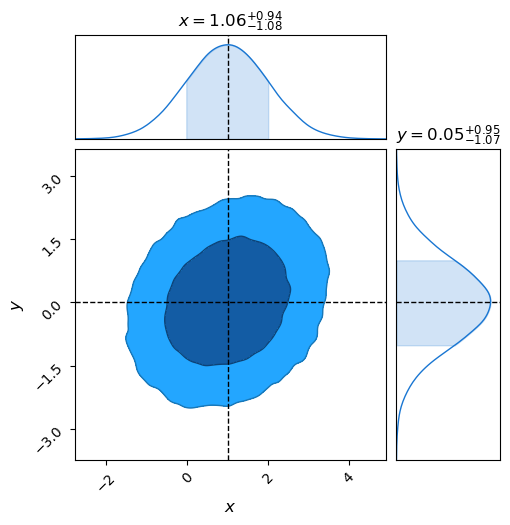

In [2]:
mu = np.array([1,0])
cov = np.array([[1,0.2],[0.2,1]])
truth_sample = np.random.multivariate_normal(mu, cov, 100000)

c = ChainConsumer()
c.add_chain(truth_sample, parameters=["$x$", "$y$"], name='truth')
c.plotter.plot(figsize="column", truth=mu)
plt.show()
plt.close()

In [3]:
class Gibbs_2d():
    def __init__(self, pxy, pyx):
        """
        Args:
            pxy (function): sample x conditioned on y
            pyx (function): sample y conditioned on x
        """
        self.pxy = pxy
        self.pyx = pyx

    def run(self,N,xyinit=[0.0,0.0]):
        samples = [xyinit]
        for i in range(N):
            y0 = samples[-1][1]
            x1 = self.pxy(y0)
            y1 = self.pyx(x1)
            samples.append([x1,y1])
        return np.array(samples[1:])

def pxy(mu,cov):
    """
    In the simple 2d gaussian case we can explicitly solve for the conditional distribution between x and y
    The conditional distributions are 1d Gaussians, with mean and variance given below

    Args:
        mu (_type_): joint mean vector
        cov (_type_): joint covariance
    """
    def sample_pxy(y):
        """
        Args:
            y (_type_): conditional value of y
        """
        xmean = mu[0]+cov[0,1]/cov[1,1]*(y-mu[1])
        xvar = cov[0,0]-cov[0,1]**2/cov[1,1]
        return np.random.normal(xmean,np.sqrt(xvar))
    return sample_pxy

def pyx(mu,cov):
    def sample_pyx(x):
        ymean = mu[1]+cov[0,1]/cov[0,0]*(x-mu[0])
        yvar = cov[1,1]-cov[0,1]**2/cov[0,0]
        return np.random.normal(ymean,np.sqrt(yvar))
    return sample_pyx



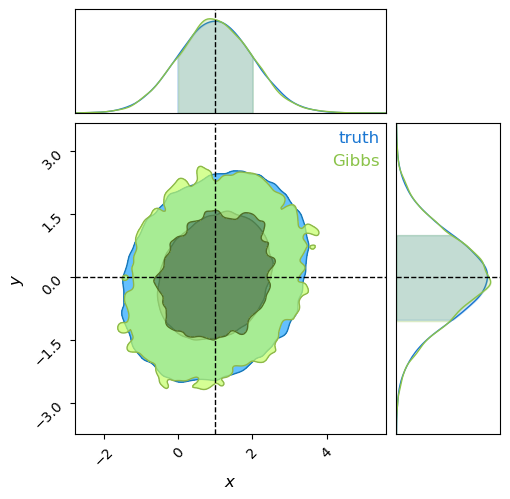

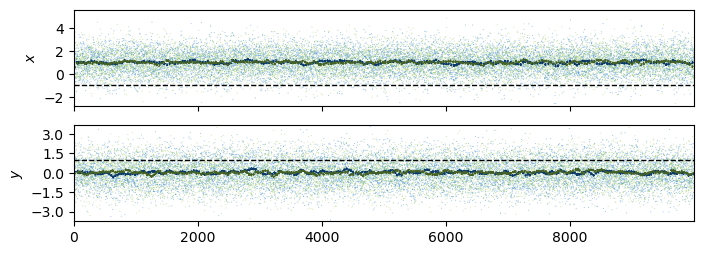

In [5]:
sample_pxy,sample_pyx = pxy(mu,cov), pyx(mu,cov)
sampler = Gibbs_2d(sample_pxy,sample_pyx)
res = sampler.run(N=10000,xyinit=[0.0,0.0])

c = ChainConsumer()
c.add_chain(truth_sample, parameters=["$x$", "$y$"],name='truth')
c.add_chain(res, parameters=["$x$", "$y$"],name='Gibbs')
c.plotter.plot(figsize="column", truth=mu)
plt.show()
plt.close()
c.plotter.plot_walks(truth={"$x$": -1, "$y$": 1, "$z$": -2}, convolve=100)
plt.show()
plt.close()

## issues of parameter degeneracy

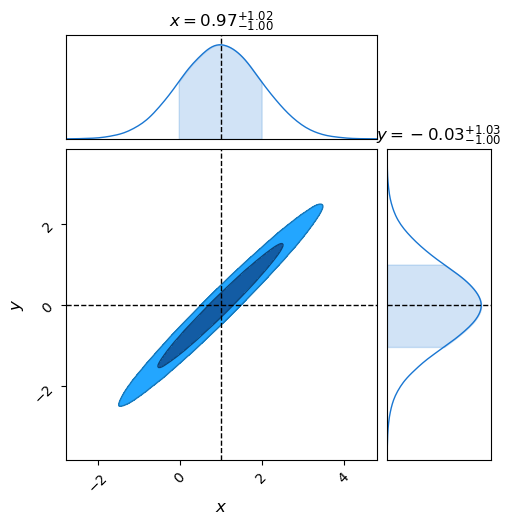

In [6]:
mu = np.array([1,0])
cov = np.array([[1,0.995],[0.995,1]])
truth_sample = np.random.multivariate_normal(mu, cov, 100000)
c = ChainConsumer()
c.add_chain(truth_sample, parameters=["$x$", "$y$"], name='truth')
c.plotter.plot(figsize="column", truth=mu)
plt.show()
plt.close()


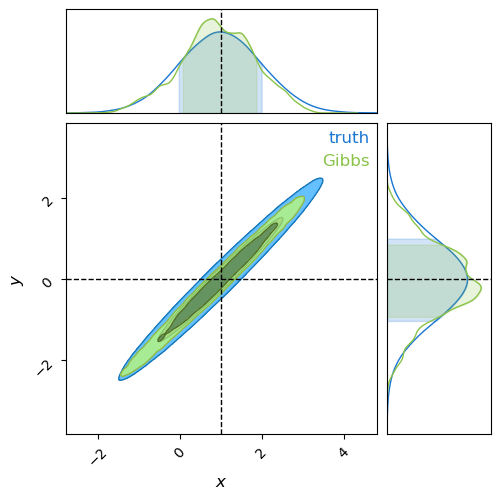

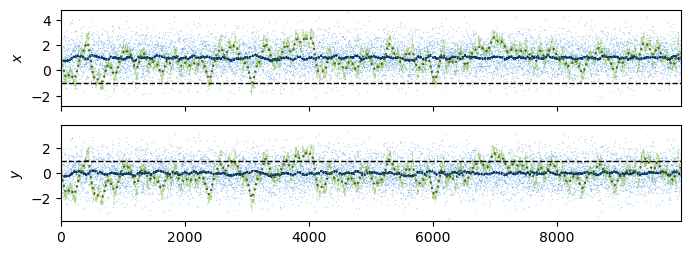

In [7]:
sample_pxy,sample_pyx = pxy(mu,cov), pyx(mu,cov)
sampler = Gibbs_2d(sample_pxy,sample_pyx)
res = sampler.run(N=10000,xyinit=[0.0,0.0])
c = ChainConsumer()
c.add_chain(truth_sample, parameters=["$x$", "$y$"],name='truth')
c.add_chain(res, parameters=["$x$", "$y$"],name='Gibbs')
c.plotter.plot(figsize="column", truth=mu)
plt.show()
plt.close()
c.plotter.plot_walks(truth={"$x$": -1, "$y$": 1, "$z$": -2}, convolve=100)
plt.show()
plt.close()